In [16]:
import nibabel as nib
import glob
import os
import shutil
import nilearn
from nilearn import plotting
%matplotlib inline

# make sure all t1w are really defaced

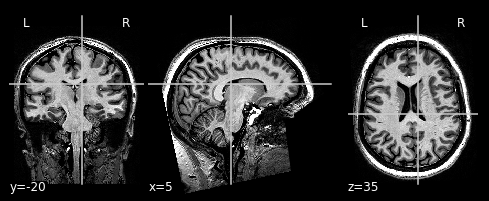

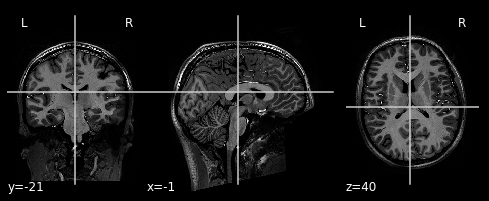

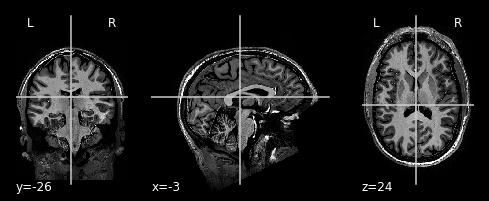

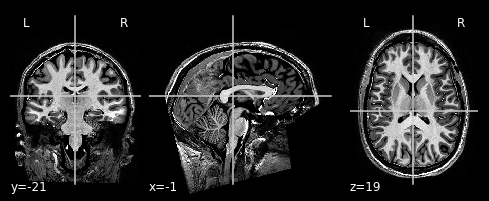

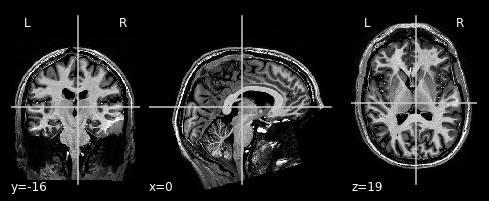

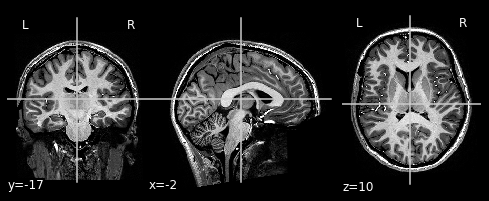

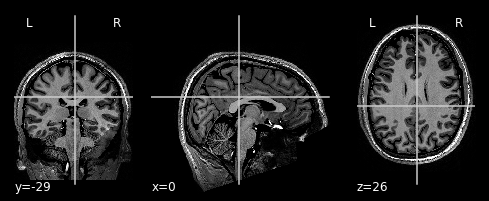

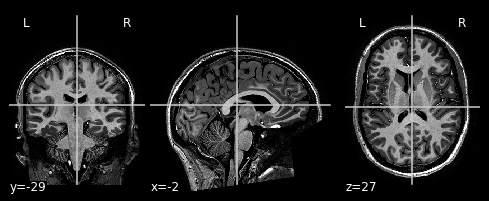

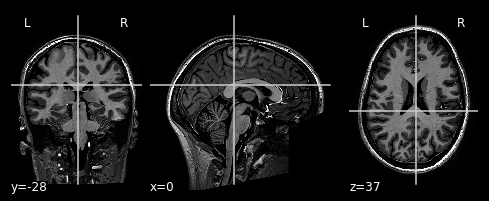

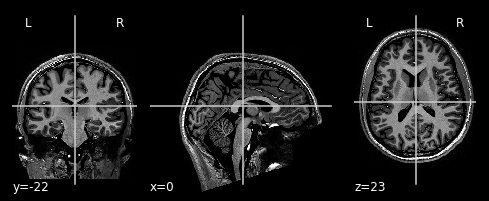

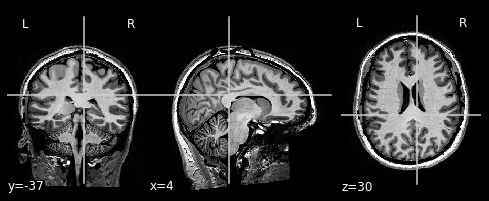

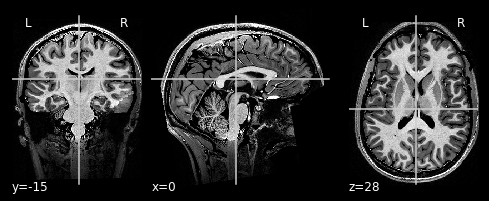

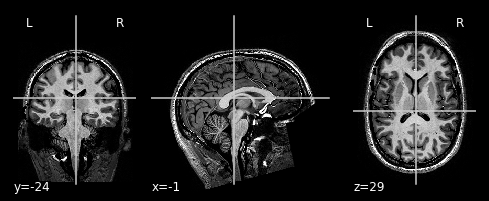

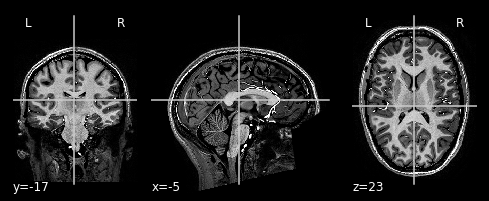

In [12]:
for fn in sorted(glob.glob('./derivatives/ds-02/fmriprep_data/sub*/anat/sub*_T1w.nii')):
    plotting.plot_anat(fn, vmax=1000)

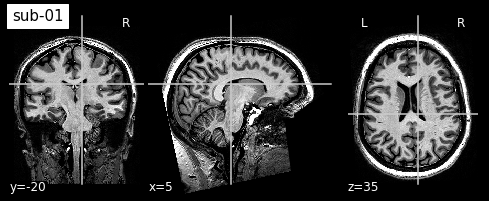

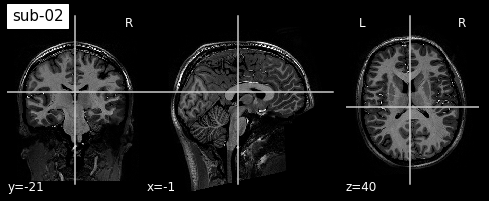

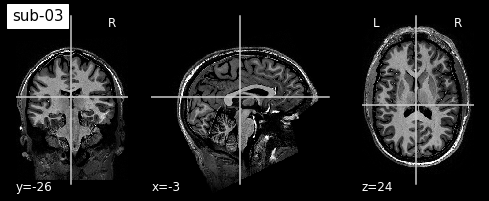

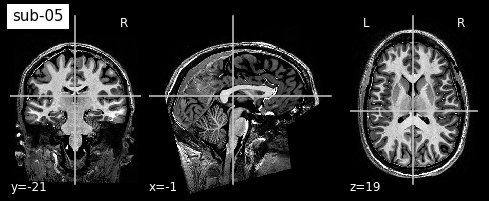

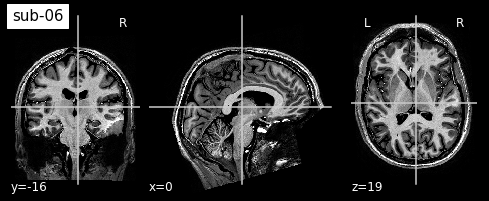

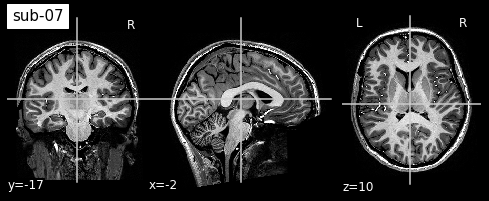

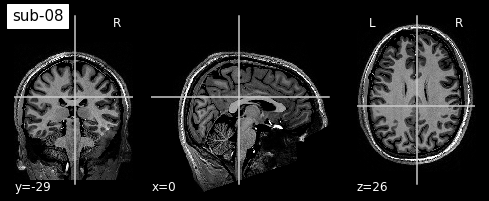

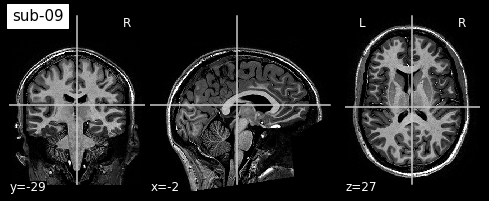

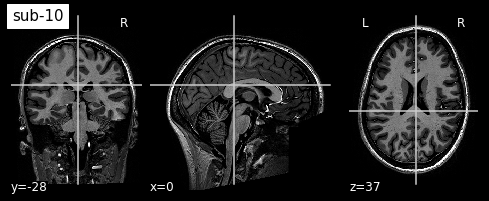

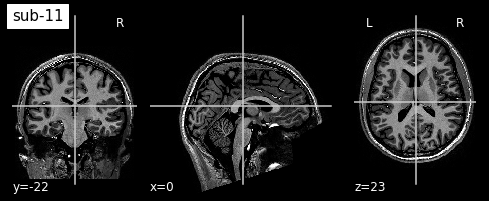

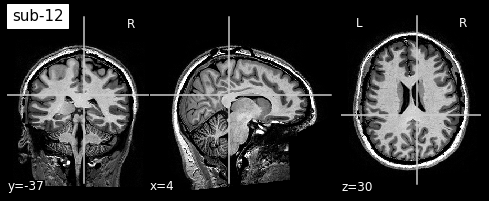

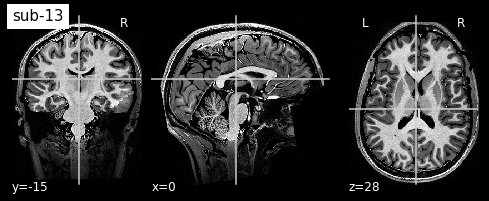

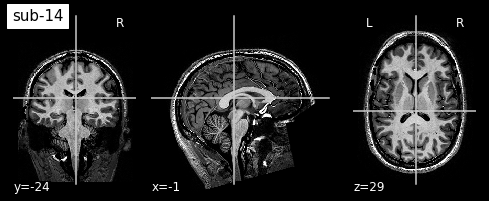

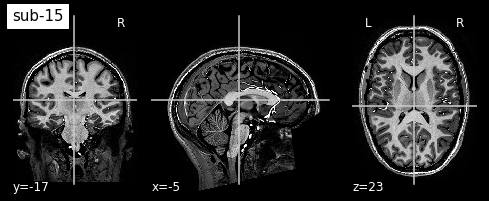

In [13]:
for fn in sorted(glob.glob('./derivatives/ds-02/fmriprep_data/sub-*/anat/sub-*_T1w.nii')):
    plotting.plot_anat(fn, vmax=1000, title==fn.split('/')[-1].replace('_T1w.nii', ''))

## Make public version of data

In [ ]:
!mkdir ./derivatives_public
!mkdir ./derivatives_public/ds-02
!mkdir ./derivatives_public/both


In [19]:
to_copy = ['./derivatives/ds-02/conjunct_masks',
           './derivatives/ds-02/extracted_signal',
           './derivatives/ds-02/feat_files',
           './derivatives/ds-02/fmriprep',
           './derivatives/ds-02/fmriprep_data',
           './derivatives/ds-02/freesurfer',
           './derivatives/ds-02/pca_masks',
           './derivatives/both/glm_level3'
           ]

In [17]:
for fn in ['./derivatives_public', './derivatives_public/ds-02', './derivatives_public/both']:
    if not os.path.exists(fn):
        os.makedirs(fn)

In [20]:
for fn in to_copy:
    print('Copying {}...'.format(fn))
    shutil.copytree(fn, fn.replace('derivatives', 'derivatives_public'))

Copying ./derivatives/ds-02/pca_masks...
Copying ./derivatives/both/glm_level3...


## Remove residuals from feat_files (too large)

In [25]:
#!rm ./derivatives_public/ds*/feat_files/sub*/run*/firstlevel.feat/filtered_func_data.nii.gz

In [26]:
#!rm ./derivatives_public/ds*/feat_files/sub*/run*/firstlevel.feat/stats/res4d.nii.gz

## Get behavior/events/confounds/timeseries of ds-02 only

In [78]:
import pandas as pd
confounds = pd.read_pickle('./derivatives/all_subjects_confounds.pkl')
confounds_ds2 = confounds.query('subject > 19').copy()
confounds_ds2 = confounds_ds2.reset_index()
confounds_ds2['subject'] -= 19
confounds_ds2.to_pickle('./derivatives_public/all_subjects_confounds_ds-02.pkl')

In [79]:
import pandas as pd
events = pd.read_pickle('./derivatives/all_subjects_events.pkl')
events_ds2 = events.query('subject > 19').copy()
events_ds2 = events_ds2.reset_index()
events_ds2['subject'] -= 19
events_ds2.to_pickle('./derivatives_public/all_subjects_events_ds-02.pkl')

In [81]:
import pandas as pd
stn_timeseries = pd.read_pickle('./derivatives/all_subjects_stn_timeseries.pkl')
stn_timeseries_ds2 = stn_timeseries.query('subject > 19').copy()
stn_timeseries_ds2 = stn_timeseries_ds2.reset_index()
stn_timeseries_ds2['subject'] -= 19
stn_timeseries_ds2.to_pickle('./derivatives_public/all_subjects_stn_timeseries_ds-02.pkl')

In [84]:
behavior = pd.read_csv('./derivatives/behavior.csv', index_col=0)
behavior.loc[behavior['ds']=='ds-02'].to_csv('./derivatives_public/behavior_ds-02.csv')

In [85]:
params = pd.read_csv('./derivatives/BMAParameters.csv', index_col=0)
params = params.reset_index().rename(columns={'index': 'subject'})
params = params.loc[params['subject']>19]
params.subject -= 19
params.to_csv('./derivatives_public/BMAParameters_ds-02.csv')